In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
num_samples = 8 + 1

low = -np.pi
high = np.pi

x = np.linspace(low, high, num_samples)
y = np.sin(x)
x_smooth = np.linspace(low, high, 1000)
y_smooth = np.sin(x_smooth)

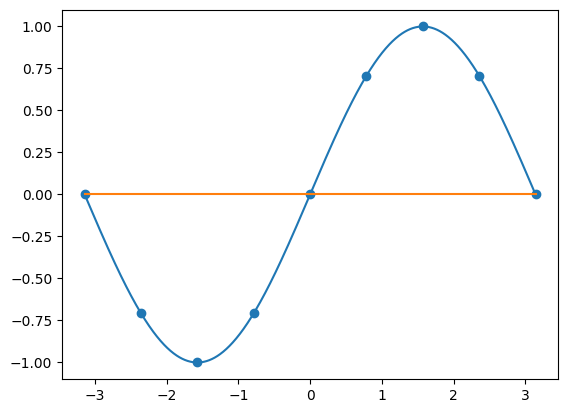

In [13]:

def plot_graph(polynomial_coefficients):
    polynomial = np.poly1d(polynomial_coefficients)
    p_smooth = polynomial(x_smooth)
    
    plt.plot(x_smooth, y_smooth)
    plt.plot(x_smooth, p_smooth)
    plt.scatter(x, y)
    plt.show()

degree = 3
polynomial_coefficients = np.zeros(degree)
plot_graph(polynomial_coefficients)

In [14]:
def mse(polynomial_coefficients):
    polynomial = np.poly1d(polynomial_coefficients)
    p = polynomial(x)
    e = p - y
    return 1/(2*num_samples) * np.sum(e**2)

print(mse(polynomial_coefficients))

0.2222222222222222


In [15]:
X = np.vstack([x**i for i in range(degree)]).T

def gradient(polynomial_coefficients):
    py = X @ polynomial_coefficients
    e = py - y
    gradient = (1/num_samples) * X.T @ e
    return gradient

print(gradient(polynomial_coefficients))


[-6.16186587e-18 -8.42719510e-01 -3.47734818e-17]


Step: ['-6.16e-20', '-0.00843', '-3.48e-19']
New coefficients: ['6.16e-20', '0.00843', '3.48e-19']
New MSE: 0.2152664846161276


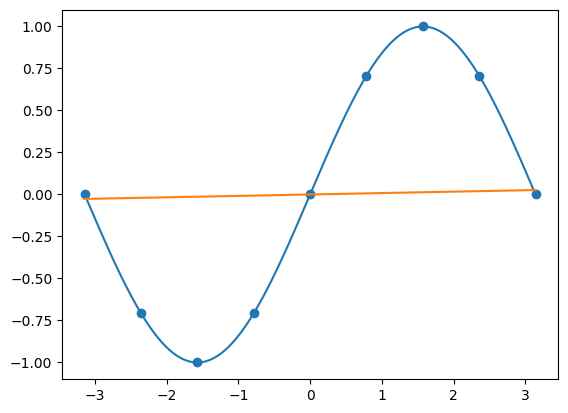

In [16]:
# Make a copy so I don't mess up original
coefficients = polynomial_coefficients.copy()

learning_rate = 0.01

step = learning_rate * gradient(coefficients)
print(f"Step: {[f'{x:.3g}' for x in step]}")

coefficients -= learning_rate * gradient(coefficients)
print(f"New coefficients: {[f'{x:.3g}' for x in coefficients]}")

print(f"New MSE: {mse(coefficients)}")
plot_graph(coefficients)
